# Environmental Analytics Lab 2
## Semester 2, 2022-23
## Dr. Bianca Schoen-Phelan

This notebook presents solutions to the tasks of lab 2 on vector data.




`Shapely` is the most popular Python library for the manipulation and analysis of planar geometric objects. It is using the widely deployed open-source geometry library GEOS (the engine of PostGIS, and a port of JTS).
[A link to the Shapely documentation (click).](https://shapely.readthedocs.io/en/stable/#)

Shapely is not pre-installed on colab. We can install libraries that are not installed using the pip bash command. Bash commands have a preceeding `!` in colab. `pip` is a package installer for Python. [A link to the pip documentation (click).](https://pip.pypa.io/en/stable/)

In [1]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Today we will use the most used geometries from the shapely library: `Point`, `LineString`, `Polygon`...and some multi geometry versions of those. A "multi"-geometry is a collection of a specific geometry. This is similar to a list of numbers or a list of strings that you would have encountered as Python's basic data types already.

In [2]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

### Points
We will start off with the `Point` data type from Shapely. A Point can be generated by using the `Point(x,y)` constructor function. Expected are up to 3 arguments, x, y and possibly a z coordinate. z is the depth used for 3D capabilities. A point is a so-called  "zero-dimensional" feature, as it has **zero length** and **zero area**.

Let's create some points and see how they behave.

In [3]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

Look at the shapes that where just defined.
This command only works for outputting the shape if it's the only command in a colab cell.

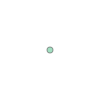

In [4]:
point1

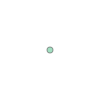

In [5]:
point2

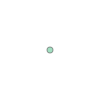

In [6]:
point3

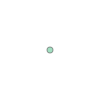

In [7]:
point3D

You can print the content of a geometric object directly to screen.

In [8]:
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


Check the data type of the created objects.

In [9]:
print(type(point1))
print(type(point2))
print(type(point3))
print(type(point3D))

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>


Access the geometry type through [geom_type](https://shapely.readthedocs.io/en/stable/manual.html)

In [10]:
point1.geom_type

'Point'

### Point Built-in attributes and functions
Shapely provides a lot of built-in functionality for its data types. We will explore the most important ones now.

In [11]:
# Get the coordinates
point_coords = point1.coords
print(point_coords)

In [12]:
# What is the data type?
type(point_coords)

shapely.coords.CoordinateSequence

In [13]:
# Get x and y coordinates
xy = point_coords.xy
print(xy) # contains a tuple of numpy arrays

# Get only x coordinates of Point1
x = point1.x
print(x) # plain decimal

# Whatabout y coordinate?
y = point1.y
print(y)

(array('d', [2.2]), array('d', [4.2]))
2.2
4.2


Notice that the following distance calculation is the distance on a plane. We will get to know a lot of other distance calculations as we go forward.

In [15]:
# distance calculation
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


### LineString
A `LineString` is a geometry type composed of one or more line segments.

A `LineString` is a so-called "one-dimensional" feature, as it has a **non-zero length** but **zero area**. It may approximate a curve and need not be straight. 

In [16]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

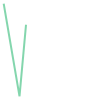

In [17]:
# plot the line
line 

In [18]:
print("Object data type:", type(line))
print("line2: \n", line2, "\n")

Object data type: <class 'shapely.geometry.linestring.LineString'>
line2: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 



### LineString attributes and functions

In [19]:
# Get x and y coordinates of the line
lxy = line.xy

In [20]:
lxy # is again a tuple with numpy arrays

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [21]:
# access via indices
# Extract x coordinates
line_xcoords = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_ycoords = line.xy[1]

In [22]:
print('line_x:\n', line_xcoords, '\n')

print('line_y:\n', line_ycoords)

line_x:
 array('d', [2.2, 7.2, 9.26]) 

line_y:
 array('d', [4.2, -25.1, -2.456])


Print the length and centroid of a linestring.
A centroid is the centre of mass of a geometric object. Centroids are widely used for calculations concerning features on the Earth.

In [23]:
# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

In [24]:
# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", type(l_centroid))

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.892411157572392)
Type of the centroid: <class 'shapely.geometry.point.Point'>


### Polygons
Polygon needs at least three coordinate-tuples (that basically forms a triangle).

A `Polygon` type represents an area that is enclosed by a linear ring.

A polygon is a so-called "two-dimensional" feature and has a **non-zero area**. It may have one or more negative-space “holes” which are also bounded by linear rings. If any rings cross each other, the feature is invalid and operations on it may fail.

In [25]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# It is also possible to produce the same outcome using a list of lists which contain the point coordinates.
# We can do this using the point objects we created before and a list comprehension:
# --> here, we pass a list of lists as input when creating the Polygon (the linst comprehension generates this list: [[2.2, 4.2], [7.2, -25.1], [9.26, -2.456]]):
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

#### Task 1
Display the Polygon. You can do this by simply calling its name.
What shape is it? 

After today's lecture go back to this task and explain what type of polygone this is.

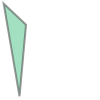

In [26]:
poly

This is a simple polygon, in fact, it is a triangle.

Get the polygon's coordinate values.

Notice how Polygon output has double paranthesis. This is to facilitate holes.



In [27]:
print('poly:', poly)
print('poly2:', poly2)

poly: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
poly2: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Check the data type.

In [28]:
print("Object data type:", type(poly))
print("Geometry type as text:", poly.geom_type)

Object data type: <class 'shapely.geometry.polygon.Polygon'>
Geometry type as text: Polygon


Check what's available in the Polygon help.

In [29]:
help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A geometry type representing an area that is enclosed by a linear ring.
 |  
 |  A polygon is a two-dimensional feature and has a non-zero area. It may
 |  have one or more negative-space "holes" which are also bounded by linear
 |  rings. If any rings cross each other, the feature is invalid and
 |  operations on it may fail.
 |  
 |  Parameters
 |  ----------
 |  shell : sequence
 |      A sequence of (x, y [,z]) numeric coordinate pairs or triples, or
 |      an array-like with shape (N, 2) or (N, 3).
 |      Also can be a sequence of Point objects.
 |  holes : sequence
 |      A sequence of objects which satisfy the same requirements as the
 |      shell parameters above
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A s

Create a polygon with a hole inside and display it.

In [30]:
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [31]:
# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

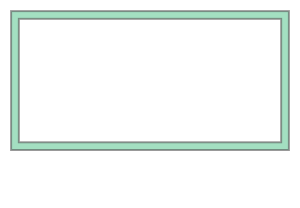

In [32]:
world_has_a_hole

In [33]:
print('world:', world)
print('world_has_a_hole:', world_has_a_hole)
print('type:', type(world_has_a_hole))

world: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
world_has_a_hole: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
type: <class 'shapely.geometry.polygon.Polygon'>


#### Task 2
Think about this exercise. Which natural featuers could be represented by a polygon with a hole?

Answer (there are many more): 


*   Lakes inside a county or country border that are both represented as polygons
*   Islands inside a lake or ocean
*   Volcanos can be represented by polygons with holes that have holes




### Polygon attributes and functions

In [34]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

In [35]:
# to display both together we have to feed them to matplotlib
# or a similar plotting module
import matplotlib.pyplot as plt

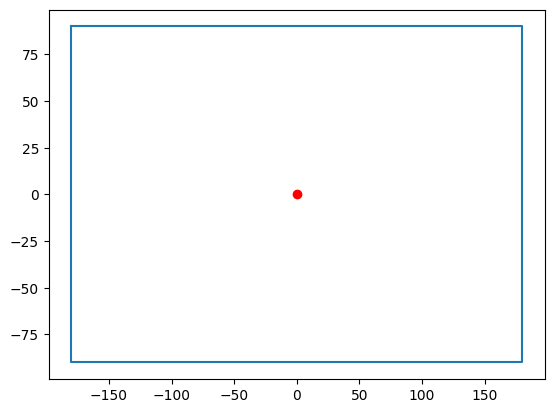

In [36]:
x,y =  world.exterior.xy
plt.plot(x,y)
c_x, c_y = world_centroid.xy
plt.plot(c_x, c_y, 'ro') # we wouldn't see anything without the ro

In [37]:
# Print the outputs
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (0 0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


### Geometry Collections
All the basic Shapely data types can also be represented as a collection. These are similar to collection types of basic Python types such as lists and tuples.

In [38]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box


In [39]:
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

# Print outputs
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


Check out all the shapes.

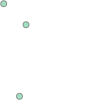

In [40]:
multi_point

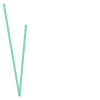

In [41]:
multi_line

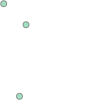

In [42]:
multi_point2

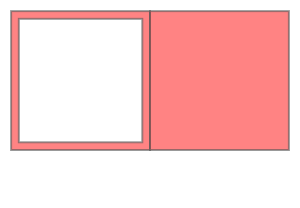

In [43]:
multi_poly

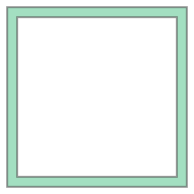

In [44]:
west_poly

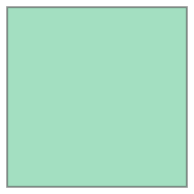

In [45]:
east_poly_box

### Geometry Collection attributes and functions

The convexity of a polygon is a feature often used for analysis of problems on the Earth. Convex means that the polygon has no corner that is bent inwards.

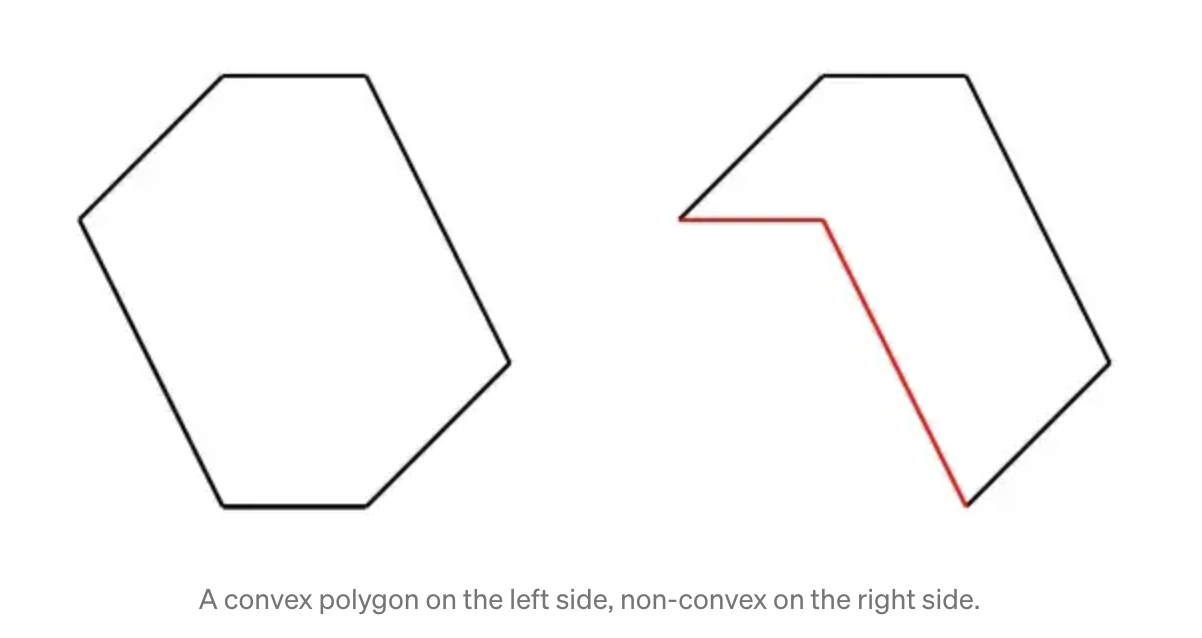

[image source see article in your brightspace]

A convex hull is a convex polygon that encloses a set of points.

In [46]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull

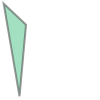

In [47]:
convex

How many lines do we have in a MultiLineString? This is actually a complex question, as the MultiLineString has been constructed from several LineString objects. The MultiLineString itself is not iterable.

However, you can access each individual element in the MultiLineString using the ```geoms``` attribute. 

Then you can loop over it. Remember though that in Python, a for loop does not give you the index of the loop count you are on. You either need to keep track of it using a runner variable manually, or use enumerate over the object you are looping over, which will give you the index starting at 0.



In [48]:
# How many lines do we have inside our MultiLineString?

for index, line in enumerate(multi_line.geoms):
  # print the individual line segments
  print(line)

# get the count, remember that index starts at 0
line_count = index+1

print("Number of lines in MultiLineString:", line_count)


LINESTRING (2.2 4.2, 7.2 -25.1)
LINESTRING (7.2 -25.1, 9.26 -2.456)
Number of lines in MultiLineString: 2


Calculate the area.

In [49]:
# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

In [50]:
multi_poly_area

39200.0

In [51]:
# Let's calculate the area of our Western hemisphere (with a hole) 
# which is at index 0
# in this case we know that the MultiPolygon was constructed
# first with the aest_area, so that is the first index
# If this is confusing, go back up and look at how the MultiPolygon was
# constructed

west_area = multi_poly.geoms[0].area
east_area = multi_poly.geoms[1].area

# Print outputs:
print("Area of our MultiPolygon:", multi_poly_area)
print("Area of our Western polygon:", west_area)
# The west polygon is the one with the hole. The area of the hole is not
# counted towards the polygon's area

print("Area of our Eastern polygon:", east_area)

# check that the outputs sum up to the total area count

Area of our MultiPolygon: 39200.0
Area of our Western polygon: 6800.0
Area of our Eastern polygon: 32400.0


Check for validity of `multi_poly`.

In [52]:
# Shapely defines a Polygon as invalid if any of its segments 
# intersect, including segments that are colinear. 
# This often has no easy fix (though sometimes buffer can help).
# We will look into potential approaches later in the semester.
# Invalid geometries might have an effect on your operators, which is
# important to keep in mind if you get strange results.
valid = multi_poly.is_valid
print("Is polygon valid?: ", valid)

Is polygon valid?:  False


####Task 3

Create a function called `create_point_geom()` that has two parameters (x_coord, y_coord). The function should create a shapely Point geometry object and return that.

In [53]:
# a possible solution for task 3:
def create_point_geom(x_coord, y_coord):
  return Point(x_coord, y_coord)

Test your function by running the following code cells.

In [54]:
point1 = create_point_geom(0.0, 1.1)
print(point1)
print(point1.geom_type)

# the expected output of running this cell is:
# POINT (0 1.1)
# Point

POINT (0 1.1)
Point


####Task 4
Create a function called `create_line_geom()` that takes a list of Shapely Point objects as parameter called points and returns a LineString object of those input points. In addition, you should take care that the function is used as it should:

*   Inside the function, you should first check (for example with assert-functionality or any other way you are aware of how Python can be used to handle incorrect input) that the input is a list. If something else than a list is passed for the function, you should return an Error message: "Input should be a list!"
*    You should also check that the input list contains at least two values. If not, return an Error message: "LineString object requires at least two Points!"
*    Optional: Finally, you should check that all values in the input list are truly Shapely Points. If not, return an Error message: "All list values should be Shapely Point objects!"

In [55]:
# a possible solution to task 3:
def create_line_geom(points):
  assert type(points) is list, "Error: Input should be a list!"
  assert len(points) > 1, "Error: LineString object requires at least two Points!"
  for point in points:
    assert type(point) is Point, "Error: All list values should be Shapely Point objects!"

  return LineString(points)

Demonstrate the usage of your function; For example, create a line object with two points: Point(45.2, 22.34) & Point(100.22, -3.20) and store the result in a variable called line1:

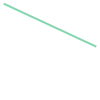

In [56]:
# demonstration of code
point_1 = Point(45.2, 22.34)
point_2 = Point(100.22, -3.20)

line1 = create_line_geom([point_1, point_2])
line1

In [57]:
# demo of code showing the error messages for some
# wrong input
# this specific one runs into the last point of the 
# checks from task 4.
try:
  line_example = create_line_geom([45.2, 22.34])
except Exception as e:
  print(e)
else:
  print("No errors found")
finally:
  print("Try producing more errors and make your function bullet proof!")

# please check the other checks in your own time

Error: All list values should be Shapely Point objects!
Try producing more errors and make your function bullet proof!


####Task 5
Try producing another error.

In [58]:
# another example
# demonstration of code with an assertion for list
point_1 = Point(45.2, 22.34)
point_2 = Point(100.22, -3.20)

try:
  line1 = create_line_geom(point_1)
except Exception as e:
  print(e)
else:
  print("No errors found")
finally:
  print("Try producing more errors and make your function bullet proof!")

Error: Input should be a list!
Try producing more errors and make your function bullet proof!


In [59]:
# demonstration of code with an assertion for small length for list
point_1 = Point(45.2, 22.34)
point_2 = Point(100.22, -3.20)

try:
  line1 = create_line_geom([point_1])
except Exception as e:
  print(e)
else:
  print("No errors found")
finally:
  print("Try producing more errors and make your function bullet proof!")

Error: LineString object requires at least two Points!
Try producing more errors and make your function bullet proof!


####Task 6
Create a function called `create_poly_geom()` that has one parameter called `coords`. The `coords` parameter should containt a list of coordinate tuples. The function should create and return a Polygon object based on these coordinates.

*    Inside the function, you should first check (for example using Python assert statements or any other way you know in Python to control user inputs). If something else than a list is passed for the function, you should return an Error message: "Input should be a list!"
*    You should also check that the input list contains at least three values. If not, return an Error message: "Polygon object requires at least three Points!"
*    Check the data type of the objects in the input list. All values in the input list should be tuples. If not, return an error message: "All list values should be coordinate tuples!" using assert.
*    Optional: Allow also an input containing a list of Shapely Point objects. If coors contans a list of Shapely Point objects, return a polygon based on these points. If the input is neither a list of tuples, nor a list of Points, return an appropriate error message using assert.

In [60]:
# your code goes here
def create_poly_geom(coords):
  assert type(coords) is list, "Error: Input should be a list!"
  assert len(coords) > 2, "Error: Polygon object requires at least three Points!"
  for coord in coords:
    assert type(coord) in [tuple, Point], "Error: All list values should be coordinate tuples or Points!"
      
  return Polygon(coords)

Check if your function checks the length of the input correctly by running this code cell:

No errors found
POLYGON ((0 0, 0 5, 2 5, 2 0, 0 0))
<class 'shapely.geometry.polygon.Polygon'>


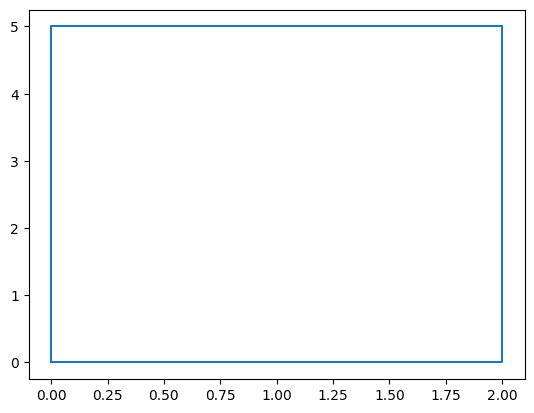

In [61]:
# use this code to check if your function works:

try:
  my_poly = create_poly_geom([(0, 0), (0, 5), (2,5), (2,0)])
except Exception as e:
  print(e)
else:
  print("No errors found")
  print(my_poly)
  print(type(my_poly))


  # this will only run if you have imported matplotlib earlier
  # if not or your session restarted/timed out, uncomment 
  # the following line
  # 
  # import matplotlib.pyplot as plt
  # 

  x,y = my_poly.exterior.xy
  plt.plot(x,y)



In [62]:
try:
    # Pass something else than a list
    create_poly_geom("Give me a polygon")
except Exception as e:
  print(e)
else:
  print("No errors found")
finally:
  print("Try producing more errors and make your function bullet proof!")

Error: Input should be a list!
Try producing more errors and make your function bullet proof!


####Task 7
Create a function called `get_centroid()` that has one parameter called `geom`. The function should take any kind of Shapely's geometric -object as an input, and return a centroid of that geometry. The centroid is the centre of mass of any geometry.
In addition, you should take care that the function is used as it should:

*    Inside the function, you should first check that the input is a Shapely `Point`, `LineString` or `Polygon` geometry. If something else than these is passed for the function, you should return an Error message: "Input should be a Shapely geometry!"

In [63]:
# your code goes here
def get_centroid(geom):
  assert type(geom) in [Point, LineString, Polygon], "Error: Input should be a Shapely geometry!"
  return geom.centroid

Test and demonstrate the usage of the function. You can, for example, create shapely objects using the functions you created in previous tasks and print out information about their centroids:

In [64]:
# your code goes here
print(get_centroid(convex))
print(get_centroid(line1))
print(get_centroid(west_poly))

POINT (6.22 -7.785333333333334)
POINT (72.71000000000001 9.57)
POINT (-90 0)


Check that everything works correctly using the following code:

In [65]:
centroid = get_centroid(poly)
print(centroid)

POINT (6.22 -7.785333333333334)


Now try to produce an error:

In [66]:
try:
    # Pass something else than a Shapely geometry
    get_centroid("Give me a centroid!")
except Exception as e:
  print(e)
else:
  print("No errors found")
finally:
  print("Try producing more errors and make your function bullet proof!")

Error: Input should be a Shapely geometry!
Try producing more errors and make your function bullet proof!


####Task 8
Create a function called `get_area()` with one parameter called polygon. Function should take a Shapely's Polygon -object as input and returns the area of that geometry.

*    Inside the function, you should first check that the input is a Shapely Polygon geometry. If something else than a polygon is passed for the function, you should return an Error message: "Input should be a Shapely Polygon -object!"

In [67]:
# your code goes here
def get_area(polygon):
  assert type(polygon) is Polygon, "Error: Input should be a Shapely Polygon -object!"
  return polygon.area

Test and demonstrate the usage of the function:

In [68]:
# Your code goes here: these will work
print(get_area(east_poly_box))
print(get_area(west_poly))

32400.0
6800.0


In [69]:
# this will not work
try:
  print(get_area(line1))
except Exception as e:
  print(e)
else:
  print("No errors found")
finally:
  print("Try producing more errors and make your function bullet proof!")

Error: Input should be a Shapely Polygon -object!
Try producing more errors and make your function bullet proof!


Test with the following code:

In [70]:
area = get_area(poly)
print(round(area, 2))

86.79


In [71]:
try:
    # Pass something else than a Shapely geometry
    get_area("Give me an area!")
except Exception as e:
  print(e)
else:
  print("No errors found")
finally:
  print("Try producing more errors and make your function bullet proof!")

Error: Input should be a Shapely Polygon -object!
Try producing more errors and make your function bullet proof!


####Task 9
Create a function called `get_length()` with parameter called `geom`. The function should accept either a Shapely `LineString` or `Polygon` -object as input. The function should check the type of the input and return the length of the line if input is `LineString` and length of the exterior ring if input is `Polygon`. If something else is passed to the function, you should return an Error "'geom' should be either LineString or Polygon!". 

In [72]:
# Your code goes here
def get_length(geom):
  assert type(geom) in [LineString, Polygon], "Error: 'geom' should be either LineString or Polygon!"
  length = 0

  if type(geom) is LineString:
    length = geom.length
  else:
    length = geom.exterior.length

  return length

Test and demonstrate the usage of the function:

In [73]:
length1 = get_length(poly)
print(length1)

length2 = get_length(poly2)
print(length2)

length3 = get_length(line2)
print(length3)

62.16395199996553
62.16395199996553
22.737509450245426


The following cells should work if your code is correct:

In [74]:
line_length = get_length(line1)
print("Line length:", round(line_length,2))

Line length: 60.66


In [75]:
poly_exterior_length = get_length(poly)
print("Polygon exterior length:", round(poly_exterior_length,2))

Polygon exterior length: 62.16


Now test for the checks:

In [76]:
try:
    # Pass something else than a Shapely LineString or Polygon
    get_length(Point(1,2))
except Exception as e:
  print(e)
else:
  print("No errors found")
finally:
  print("Try producing more errors and make your function bullet proof!")

Error: 'geom' should be either LineString or Polygon!
Try producing more errors and make your function bullet proof!


**Well done for finishing this lab on Shapely vector geometries and functions. We also revised a bit on basic Python lists, tuples, for loops, iterables and how to check for correct usage of your functions.**